Plot all the L0 and L1 field embeddings via t-SNE.

For L1 fields, plot them by L0 parent, but overlay all adjacent fields regardless of their L0.

In [1]:
import pandas as pd

import field_embeddings as fe

from fos.model import FieldModel
from fos.settings import ASSETS_DIR

mag_texts = pd.read_pickle(ASSETS_DIR / 'fields/example_text.pkl.gz')
meta = pd.read_pickle(ASSETS_DIR / 'fields/fos.pkl.gz')
attrs = pd.read_pickle('../assets/fields/fos.pkl.gz')
fields = FieldModel("en")
attrs = attrs.loc[fields.index]

parents = fe.create_parent_table(attrs)
parents = parents.loc[parents.child_id.isin(fields.index)]

fe.load_fonts()

{'fonts/NunitoSans-SemiBold.ttf': <matplotlib.font_manager.FontProperties at 0x7ff4c383eee0>,
 'fonts/NunitoSans-Bold.ttf': <matplotlib.font_manager.FontProperties at 0x7ff6213b84c0>,
 'fonts/NunitoSans-ExtraLight.ttf': <matplotlib.font_manager.FontProperties at 0x7ff6213b8370>,
 'fonts/NunitoSans-Black.ttf': <matplotlib.font_manager.FontProperties at 0x7ff6213b82b0>,
 'fonts/NunitoSans-Regular.ttf': <matplotlib.font_manager.FontProperties at 0x7ff6213b8430>,
 'fonts/NunitoSans-Light.ttf': <matplotlib.font_manager.FontProperties at 0x7ff6213b80a0>}

In [7]:
ft_tsne = fe.fit_tsne(fields.field_fasttext.index, fields.index, attrs)

/home/james/miniconda3/envs/field-of-study-pipelines/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


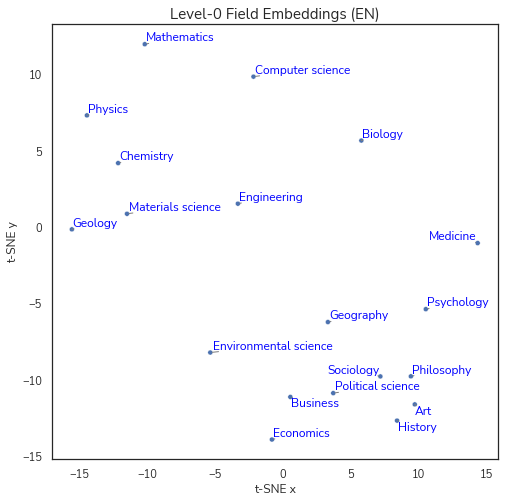

In [8]:
fe.plot_l0_scatter(ft_tsne, 'en')

In [8]:
def plot_l1_with_neighbors(tsne_df):
    tsne_df = tsne_df.copy()
    fe.set_scale(1)
    scatters = []
    for parent_name, children in parents.groupby('parent_name'):
        observed_children = children.loc[children['child_id'].isin(tsne_df.index)].copy()
        child_tsne = tsne_df.loc[observed_children['child_id']].copy()
        neighbors_tsne = tsne_df.loc[(tsne_df.x < child_tsne.x.max()) &
                                     (tsne_df.x > child_tsne.x.min()) &
                                     (tsne_df.y < child_tsne.y.max()) &
                                     (tsne_df.y > child_tsne.y.min())].copy()
        neighbors_tsne = neighbors_tsne.loc[~neighbors_tsne.index.isin(child_tsne.index)]
        neighbors_tsne = neighbors_tsne.loc[neighbors_tsne.display_name != parent_name]
        if not neighbors_tsne.shape[0]:
            neighbors_tsne = None
        parent_tsne = tsne_df.query(f'level == 0 & display_name == "{parent_name}"').copy()
        scatter = fe.plot_tsne(child_tsne, parent_tsne=parent_tsne, neighbors_tsne=neighbors_tsne)
        scatters.append(scatter)
    return scatters

KeyboardInterrupt: 

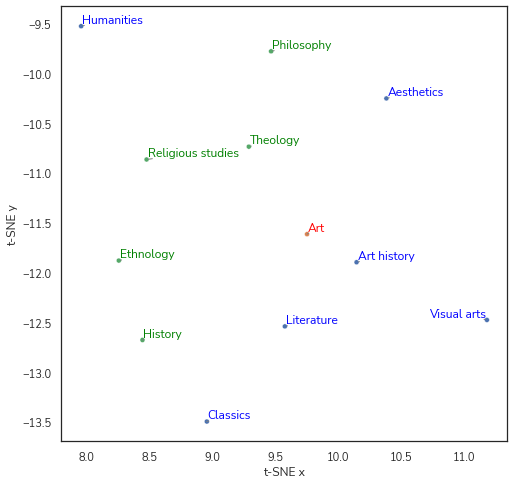

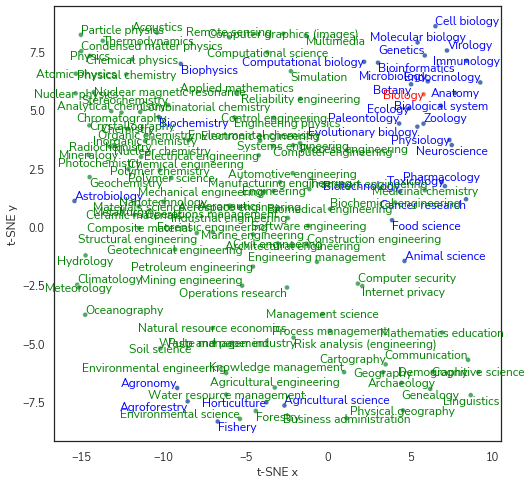

In [12]:
plot_l1_with_neighbors(ft_tsne)

In [3]:
zh_fields = FieldModel("zh")
zh_fields.index
zh_ft_tsne = fe.fit_tsne(zh_fields.field_fasttext.index, zh_fields.index, attrs)

/home/james/miniconda3/envs/field-of-study-pipelines/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


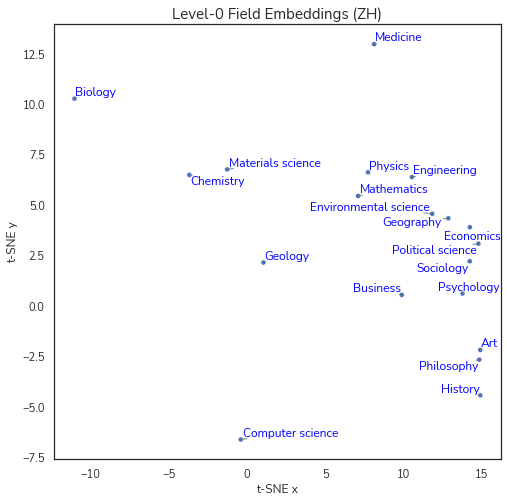

In [4]:
fe.plot_l0_scatter(zh_ft_tsne, 'zh')

[<AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>,
 <AxesSubplot:xlabel='t-SNE x', ylabel='t-SNE y'>]

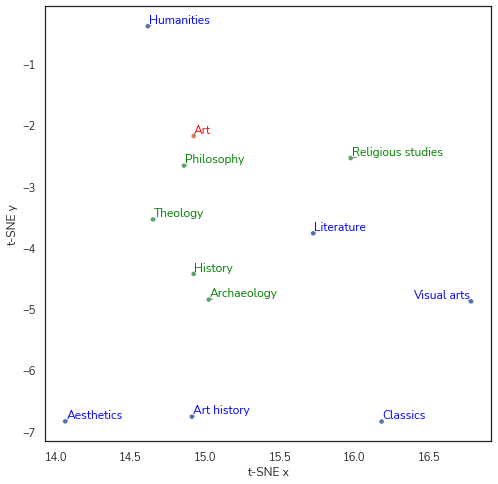

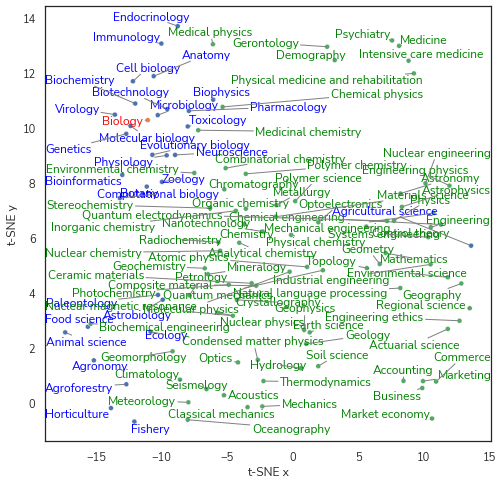

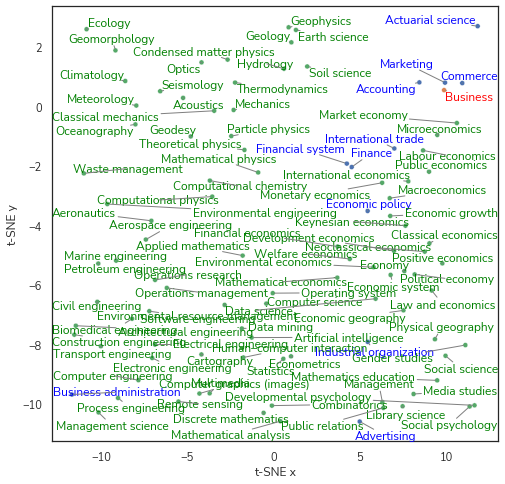

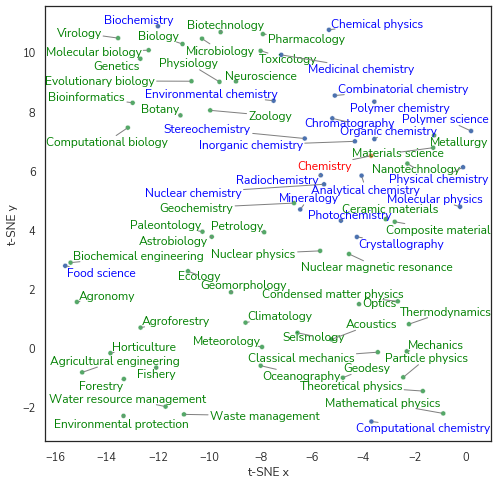

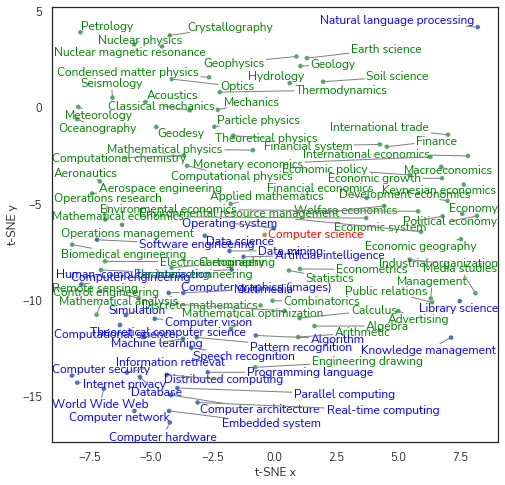

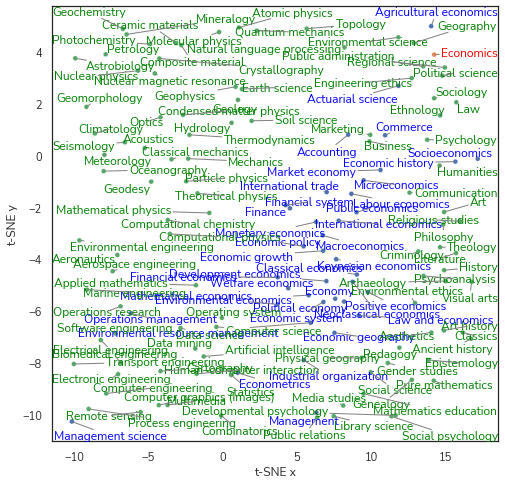

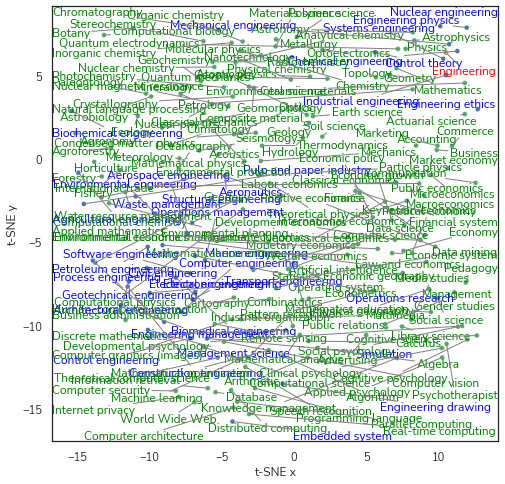

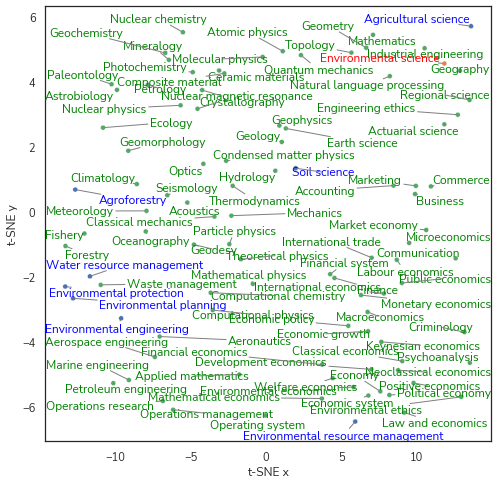

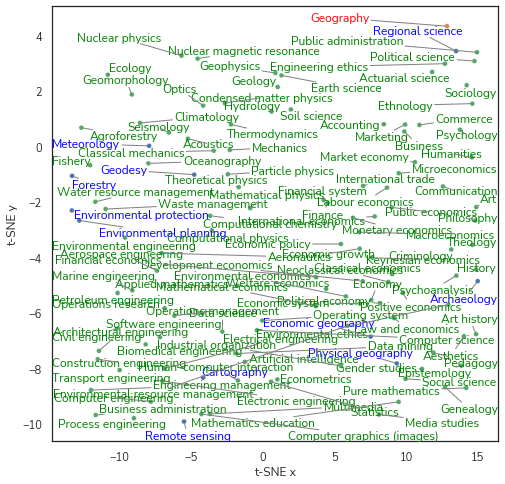

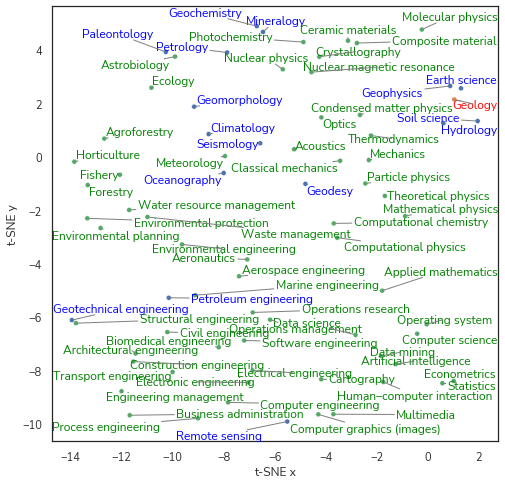

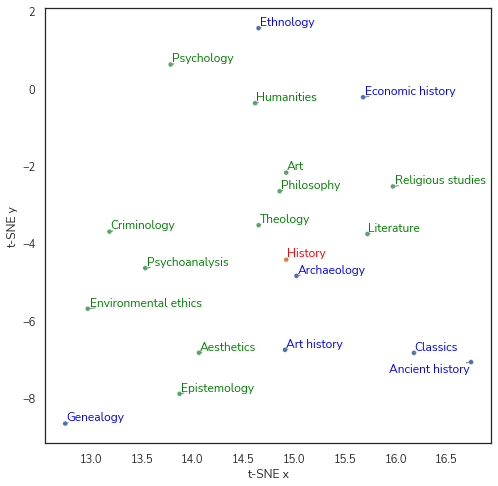

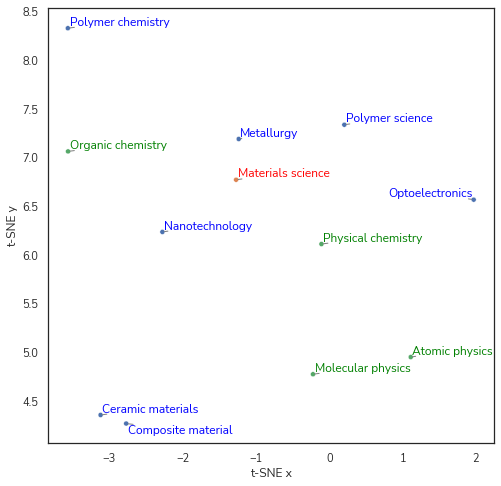

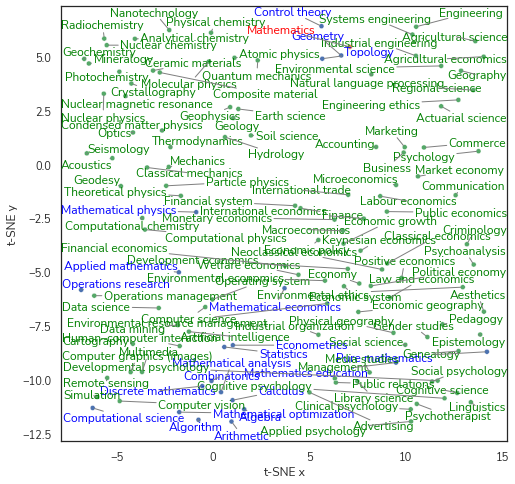

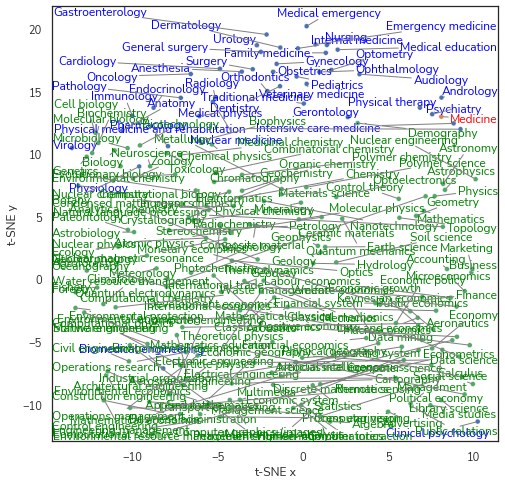

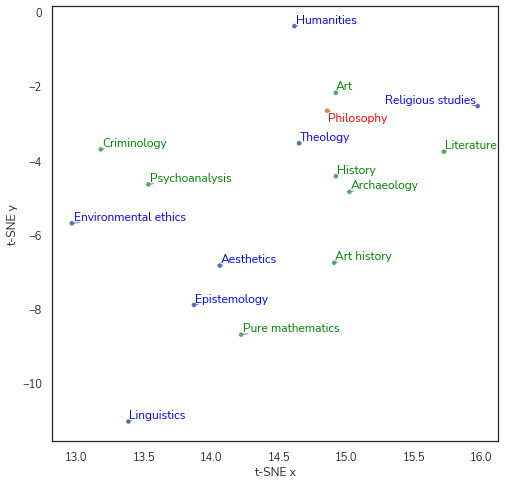

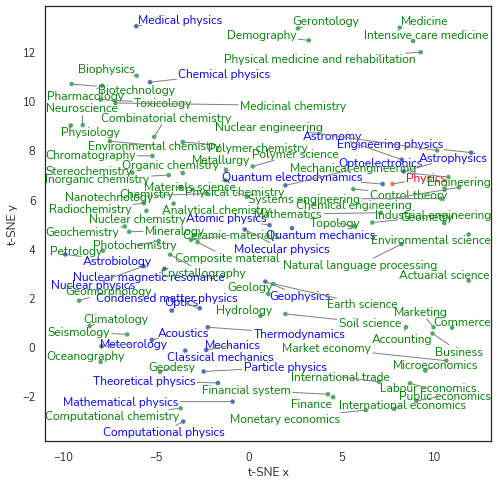

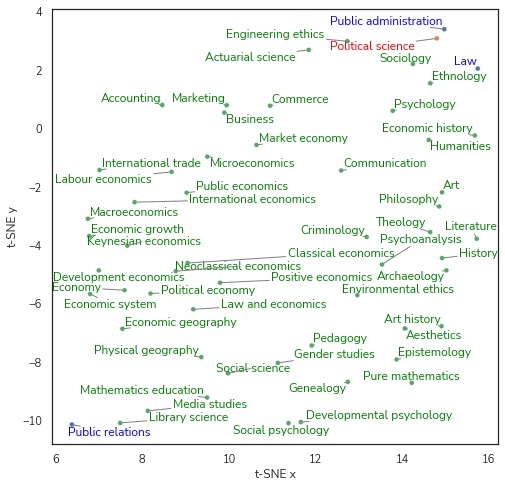

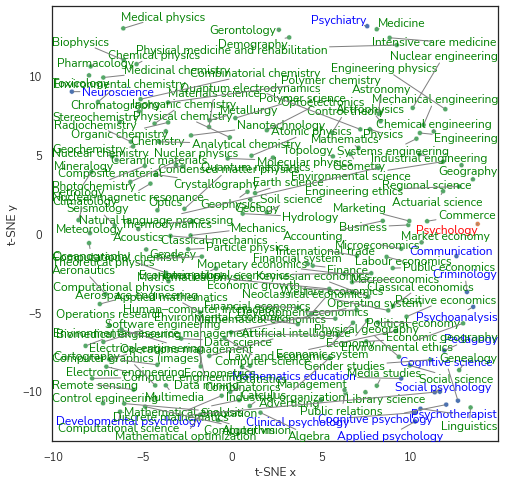

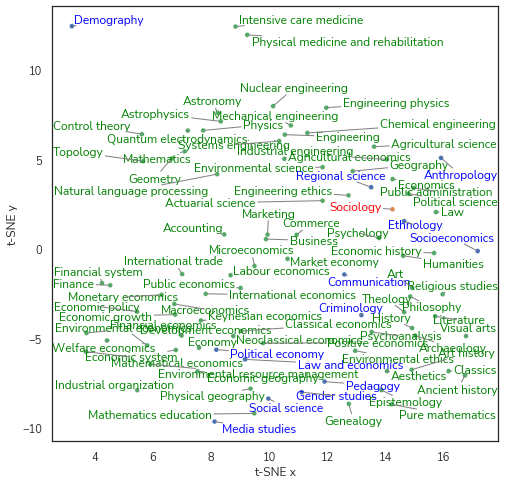

In [9]:
plot_l1_with_neighbors(zh_ft_tsne)